In [1]:
#load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

In [2]:
#main data
company_info = pd.read_csv("company_info.csv") 
monash_index = pd.read_csv("monashIndex.csv")
stock_data = pd.read_csv("stock_data.csv")
training_targets = pd.read_csv("training_targets.csv")
testing_targets = pd.read_csv("testing_targets.csv")

#optional data
fed_funds_rate = pd.read_csv ("fed_funds_rate.csv")
fed_inflation_rate = pd.read_csv ("fed_inflation_rate.csv")
fed_unemployment_rate = pd.read_csv ("fed_unemployment_rate.csv")
us_5_year_treasury = pd.read_csv ("us_5_year_treasury.csv")
us_10_year_treasury = pd.read_csv ("us_10_year_treasury.csv")
vix_index = pd.read_csv ("vix_index.csv")

In [3]:
company_info.describe(include = "all")

stock_id      sector business_model geographic_focus business_maturity  \
count       616         616            616              616               616   
unique      616          12              3                3                 3   
top       US001  Technology            B2C           Global            Mature   
freq          1         100            294              285               316   

       competitive_position market_cap_category revenue_tier  \
count                   616                 616          616   
unique                    3                   3            3   
top           Strong_Player                 Mid       Tier_2   
freq                    362                 374          374   

       profitability_profile asset_intensity financial_strength  
count                    616             616                616  
unique                     3               3                  3  
top                 Standard        Moderate             Stable  
freq                     329             300                265

In [4]:
monash_index.describe(include = "all")

month_id  index_return  index_value
count        42     42.000000    42.000000
unique       42           NaN          NaN
top     2020_01           NaN          NaN
freq          1           NaN          NaN
mean        NaN      0.008310   123.246575
std         NaN      0.045607    13.860218
min         NaN     -0.111379    83.604709
25%         NaN     -0.012409   118.909434
50%         NaN      0.005108   127.605003
75%         NaN      0.032112   133.667397
max         NaN      0.141313   139.438989

In [5]:
stock_data.describe(include = "all")

stock_id month_id  month_start_open_usd  month_end_close_usd  \
count     25618    25618          25618.000000         25618.000000   
unique      616       42                   NaN                  NaN   
top       US650  2022_12                   NaN                  NaN   
freq         42      616                   NaN                  NaN   
mean        NaN      NaN            133.718601           134.509803   
std         NaN      NaN            245.900862           248.289855   
min         NaN      NaN              0.700000             0.710000   
25%         NaN      NaN             40.769500            40.839000   
50%         NaN      NaN             78.925000            79.129000   
75%         NaN      NaN            156.383750           157.484000   
max         NaN      NaN           5870.000000          6350.620000   

        month_high_usd  month_low_usd  monthly_volume  intramonth_return  \
count     25618.000000   25618.000000    2.561800e+04       25618.000000   
unique             NaN            NaN             NaN                NaN   
top                NaN            NaN             NaN                NaN   
freq               NaN            NaN             NaN                NaN   
mean        144.473964     123.620124    1.247736e+08           0.012421   
std         263.700953     229.767331    4.721806e+08           0.126536   
min           0.997000       0.463000    1.500000e+03          -0.836003   
25%          44.319250      37.065500    2.026318e+07          -0.054867   
50%          85.501500      72.607500    4.413910e+07           0.006757   
75%         168.718750     144.102500    1.046730e+08           0.070576   
max        6386.620000    5528.090000    1.585655e+10           3.257143   

           return_1m     return_3m     return_6m  intramonth_volatility  \
count   25597.000000  25555.000000  25483.000000           25616.000000   
unique           NaN           NaN           NaN                    NaN   
top              NaN           NaN           NaN                    NaN   
freq             NaN           NaN           NaN                    NaN   
mean        0.014740      0.042243      0.093739               0.384489   
std         0.125580      0.224537      0.397024               0.253038   
min        -0.832263     -0.891459     -0.878101               0.037019   
25%        -0.053000     -0.073179     -0.093493               0.230496   
50%         0.010027      0.026508      0.054570               0.312991   
75%         0.073907      0.137254      0.220102               0.450122   
max         3.197183      6.892996     19.942211               3.458247   

        volatility_3m  volatility_6m  trading_days  avg_volume_3m  \
count    25555.000000   25483.000000  25618.000000   2.557600e+04   
unique            NaN            NaN           NaN            NaN   
top               NaN            NaN           NaN            NaN   
freq              NaN            NaN           NaN            NaN   
mean         0.337133       0.356375     20.944414   5.641095e+06   
std          0.280432       0.240778      1.194822   2.094349e+07   
min          0.001361       0.020767      0.000000   1.440000e+02   
25%          0.174882       0.220319     20.000000   9.438960e+05   
50%          0.276629       0.300236     21.000000   2.040366e+06   
75%          0.420836       0.420214     22.000000   4.773016e+06   
max          7.123194       4.904750     23.000000   6.000172e+08   

        volume_ratio  price_range_ratio  
count   25576.000000       25618.000000  
unique           NaN                NaN  
top              NaN                NaN  
freq             NaN                NaN  
mean        1.005413           0.175590  
std         0.209451           0.126633  
min         0.046000           0.010922  
25%         0.870000           0.101960  
50%         0.984000           0.142549  
75%         1.111000           0.207368  
max         2.602000           3.457143

In [6]:
print("COMPANY INFO :")
print(" -----------------------") 
print(company_info.isnull().sum())
print(" -----------------------") 
print("MONASH INDEX :")
print(" -----------------------") 
print(monash_index.isnull().sum())
print(" -----------------------") 
print("STOCK DATA :")
print(stock_data.isnull().sum())

COMPANY INFO :
 -----------------------
stock_id                 0
sector                   0
business_model           0
geographic_focus         0
business_maturity        0
competitive_position     0
market_cap_category      0
revenue_tier             0
profitability_profile    0
asset_intensity          0
financial_strength       0
dtype: int64
 -----------------------
MONASH INDEX :
 -----------------------
month_id        0
index_return    0
index_value     0
dtype: int64
 -----------------------
STOCK DATA :
stock_id                   0
month_id                   0
month_start_open_usd       0
month_end_close_usd        0
month_high_usd             0
month_low_usd              0
monthly_volume             0
intramonth_return          0
return_1m                 21
return_3m                 63
return_6m                135
intramonth_volatility      2
volatility_3m             63
volatility_6m            135
trading_days               0
avg_volume_3m             42
volume_ratio    

In [7]:
num_missing_rows = stock_data.isnull().any(axis=1).sum()
print(num_missing_rows)

135


In [8]:
stock_data.shape

(25618, 18)

In [9]:
testing_targets.head()

month_id stock_id  outperform_binary  excess_return
0  2023_07    US001                NaN            NaN
1  2023_07    US002                NaN            NaN
2  2023_07    US003                NaN            NaN
3  2023_07    US004                NaN            NaN
4  2023_07    US005                NaN            NaN

In [10]:
full_merged = pd.merge(stock_data,company_info, on='stock_id', how= 'left')
full_merged = pd.merge(full_merged, monash_index, on= 'month_id', how = 'left')
full_merged = pd.merge(full_merged, fed_funds_rate, on= 'month_id', how = 'left')
full_merged = pd.merge(full_merged, fed_inflation_rate, on= 'month_id', how = 'left')
full_merged = pd.merge(full_merged, fed_unemployment_rate, on= 'month_id', how = 'left')
full_merged = pd.merge(full_merged, us_5_year_treasury, on= 'month_id', how = 'left')
full_merged = pd.merge(full_merged, us_10_year_treasury, on= 'month_id', how = 'left')
full_merged = pd.merge(full_merged, vix_index, on= 'month_id', how = 'left')

# First, shift the labels backward by 1 month for each stock (TO APPLY LAG TO FEATURES)
df_labels_shifted = training_targets.copy()
df_labels_shifted['month_id'] = pd.to_datetime(df_labels_shifted['month_id'], format="%Y_%m")
df_labels_shifted['month_id'] = df_labels_shifted.groupby('stock_id')['month_id'].shift(+1)

# rename labels so they carry the meaning (LABELS PREDICTED ARE OF THE YEAR AFTER)
df_labels_shifted = df_labels_shifted.rename(
    columns={
        "excess_return": "excess_return_t+1",
        "outperform_binary": "outperform_binary_t+1"
    }
)


# Convert your features month_id to datetime too
full_merged['month_id'] = pd.to_datetime(full_merged['month_id'], format="%Y_%m")

# Now join on stock_id + month_id
merged_set = pd.merge(
    full_merged,
    df_labels_shifted,
    on=['stock_id', 'month_id'],
    how='inner'
)

#SETUP FOR TESTING SET
testing_targets["month_id"] = testing_targets["month_id"].str.replace("_07","_06")
testing_targets['month_id'] = pd.to_datetime(testing_targets['month_id'], format="%Y_%m")

testing_targets = testing_targets.rename(
    columns={
        "excess_return": "excess_return_t+1",
        "outperform_binary": "outperform_binary_t+1"
    }
)

# Now join on stock_id + month_id
testing_set = pd.merge(
    full_merged,
    testing_targets,
    on=['stock_id', 'month_id'],
    how='inner'
)

In [11]:
merged_set.head()

stock_id   month_id  month_start_open_usd  month_end_close_usd  \
0    US001 2020-01-01               120.192              107.326   
1    US001 2020-02-01               108.252              101.868   
2    US001 2020-03-01               103.301               93.178   
3    US001 2020-04-01                90.100              103.697   
4    US001 2020-05-01               101.909              107.841   

   month_high_usd  month_low_usd  monthly_volume  intramonth_return  \
0         123.486        107.035        84539259          -0.107045   
1         111.641         99.636        91313882          -0.058974   
2         105.622         77.841       177930833          -0.097995   
3         111.314         89.424        98448862           0.150910   
4         110.206         89.499       103380207           0.058209   

   return_1m  return_3m  ...  index_return  index_value  fed_rate  \
0  -0.100669  -0.030041  ...     -0.006452    99.354842      1.55   
1  -0.050854  -0.112968  ...     -0.053054    94.083684      1.58   
2  -0.085299  -0.219214  ...     -0.111379    83.604709      0.65   
3   0.112885  -0.033810  ...      0.141313    95.419099      0.05   
4   0.039966   0.058641  ...      0.071232   102.215965      0.05   

   inflation_rate  unemployment_rate  5y_treasury  10y_treasury    vix  \
0        2.599768                3.6         1.33          1.52  13.94   
1        2.341317                3.5         0.91          1.13  19.63   
2        1.494040                4.4         0.38          0.70  57.74   
3        0.313047               14.8         0.34          0.62  41.45   
4        0.198201               13.2         0.30          0.65  30.90   

  outperform_binary_t+1 excess_return_t+1  
0                     0         -0.005920  
1                     1          0.013384  
2                     1          0.009597  
3                     0         -0.013023  
4                     0         -0.016346  

[5 rows x 38 columns]

In [12]:
# FILTERING "BAD" PERIOD FROM 2020 to 2020_09 ( Covid), anamalous regime
cutoff = pd.Timestamp('2020-09-01')
merged_set = merged_set.loc[merged_set['month_id'] > cutoff].copy().reset_index(drop=True)

testing_set = testing_set.loc[testing_set['month_id'] > cutoff].copy().reset_index(drop=True)

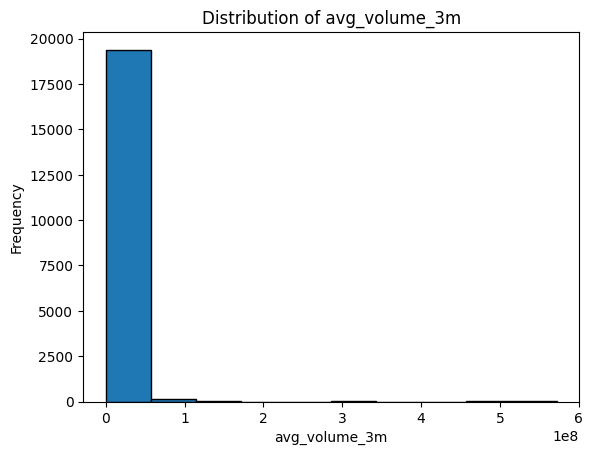

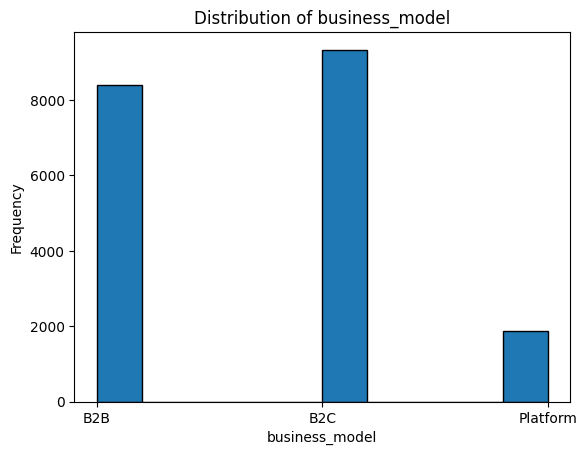

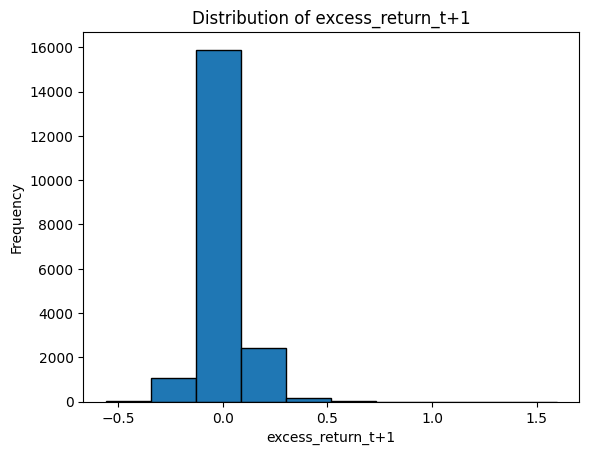

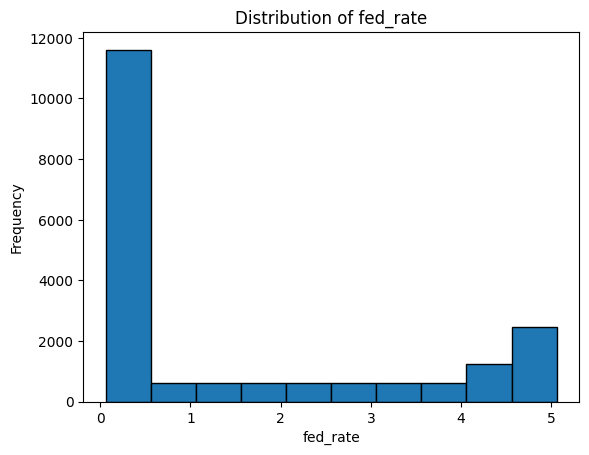

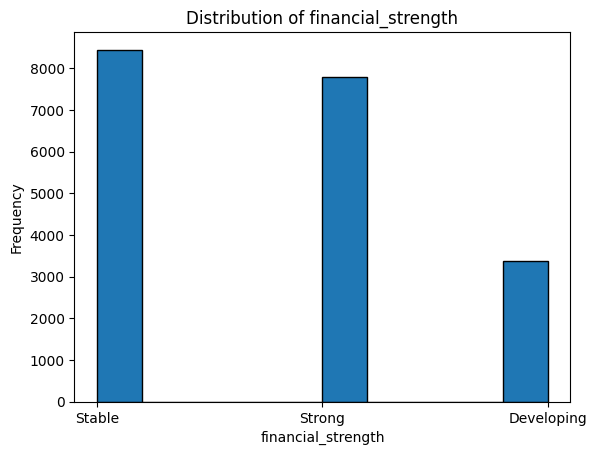

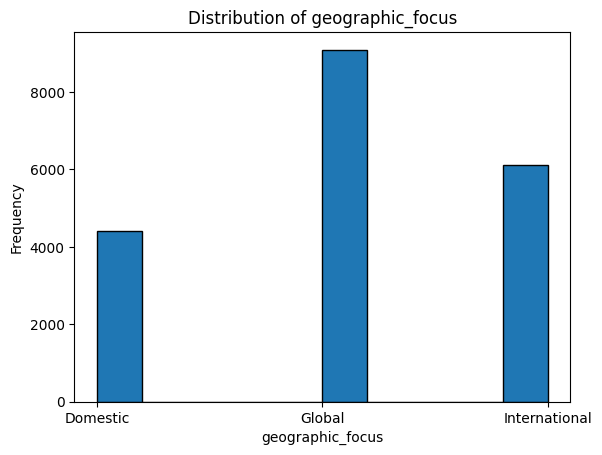

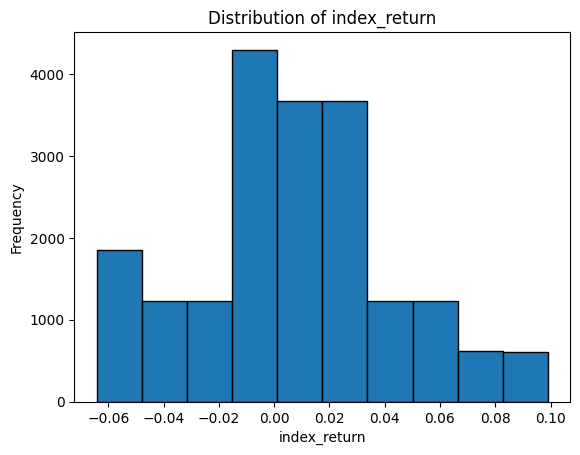

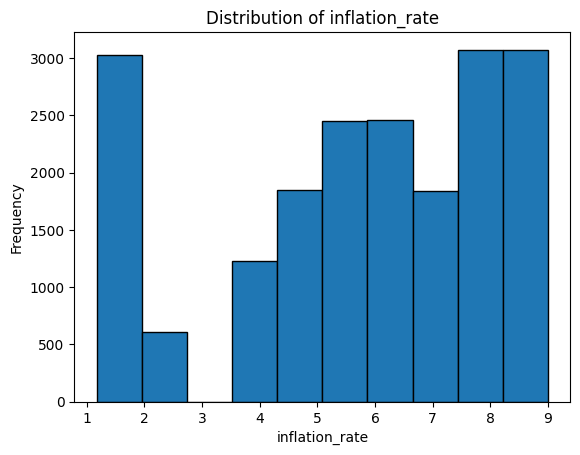

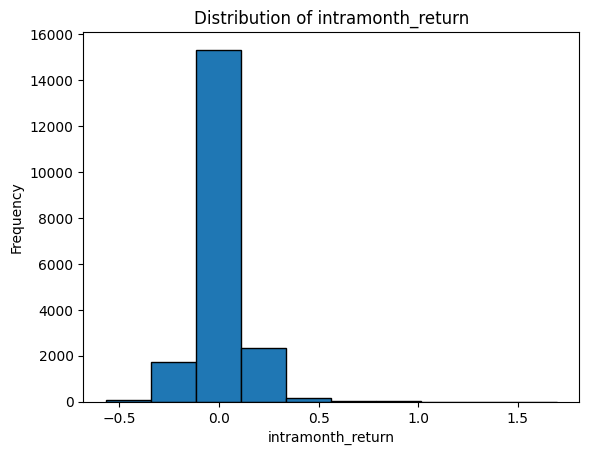

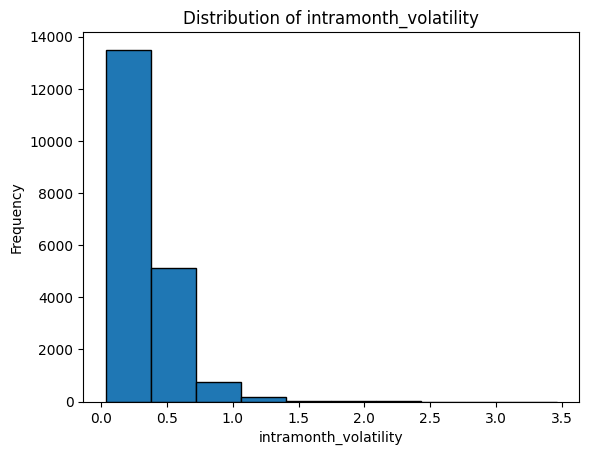

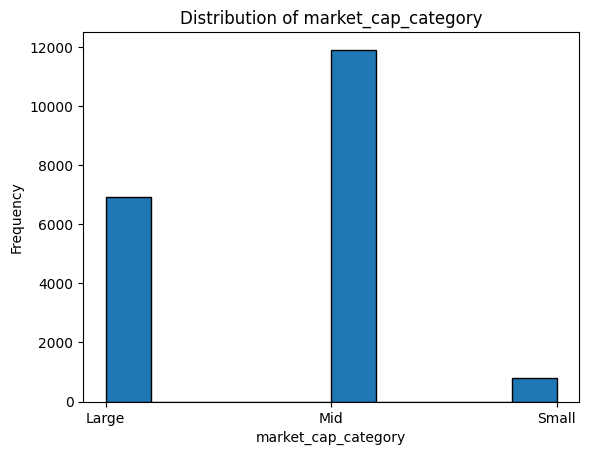

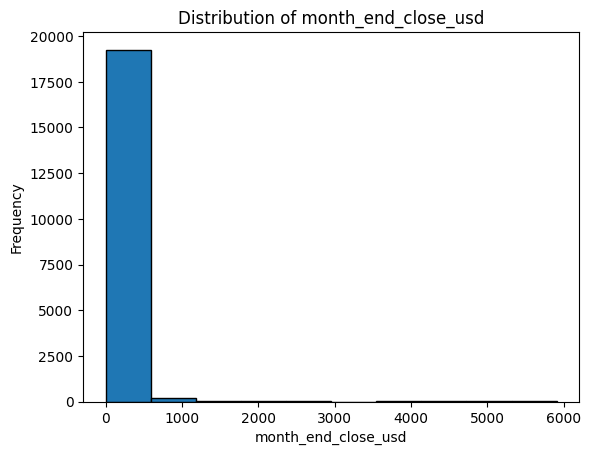

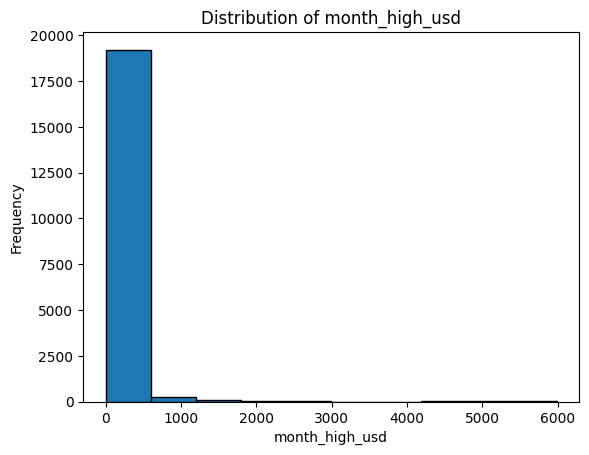

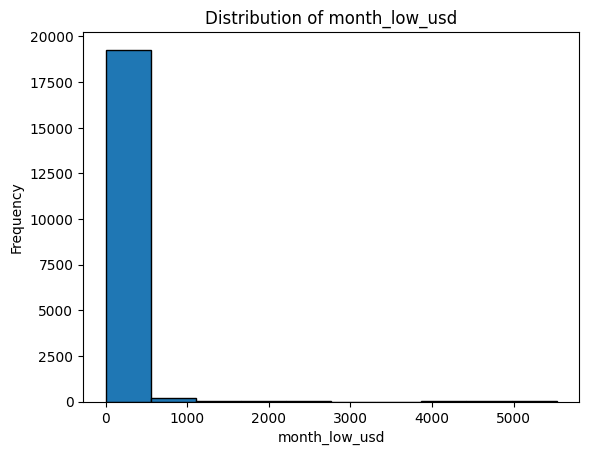

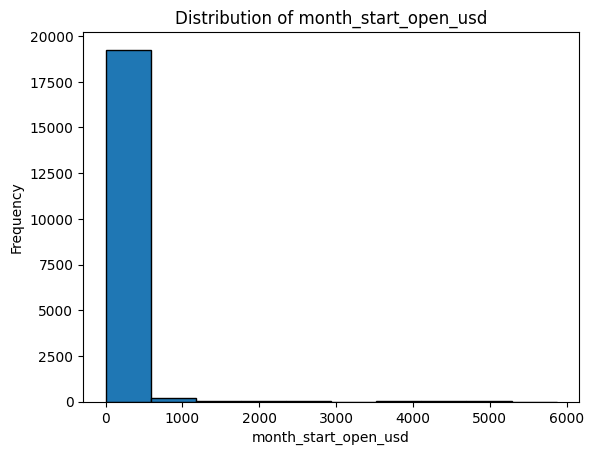

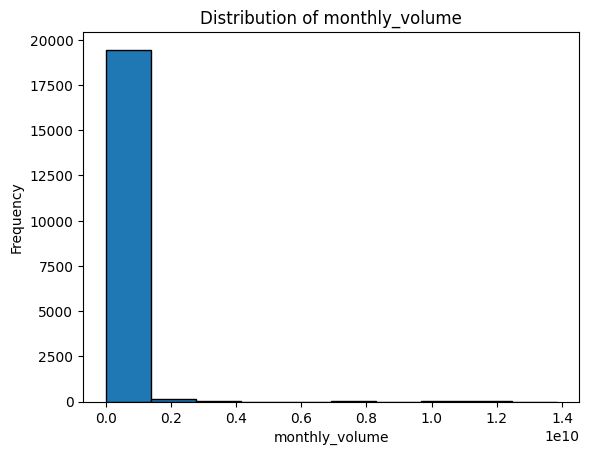

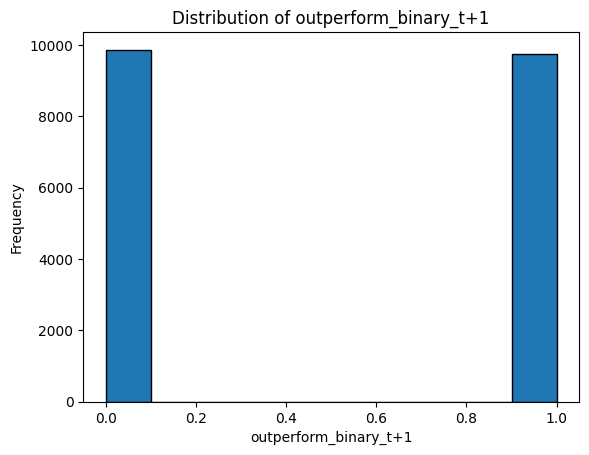

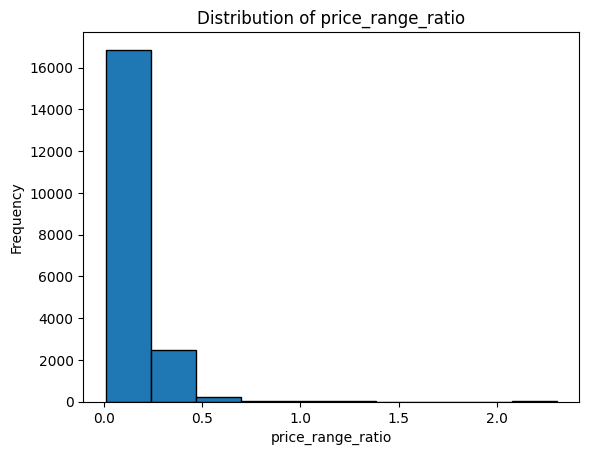

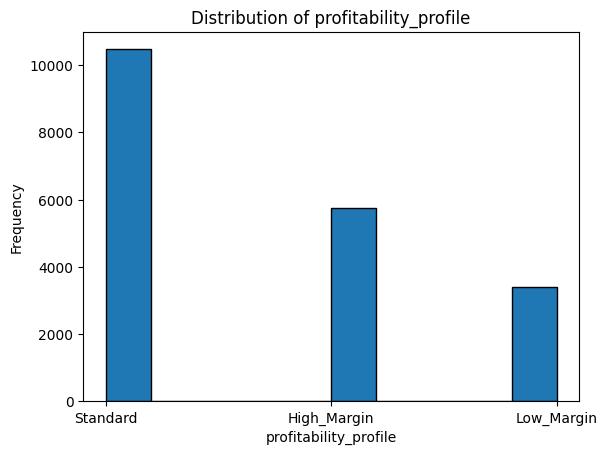

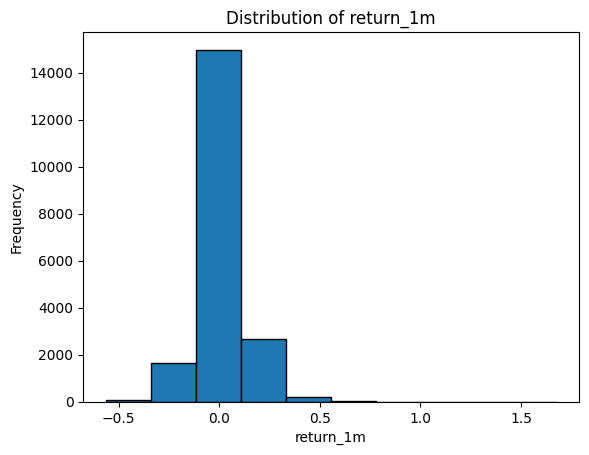

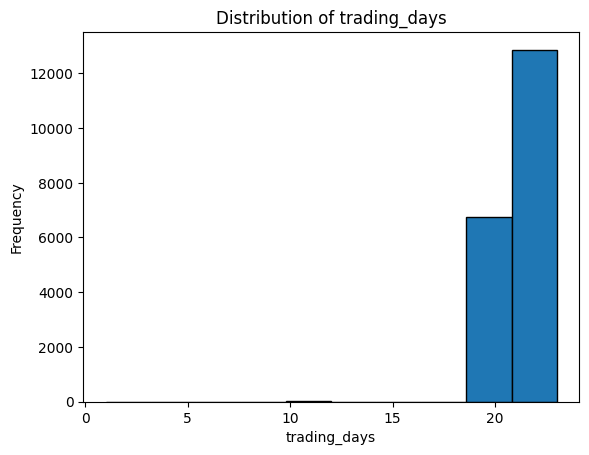

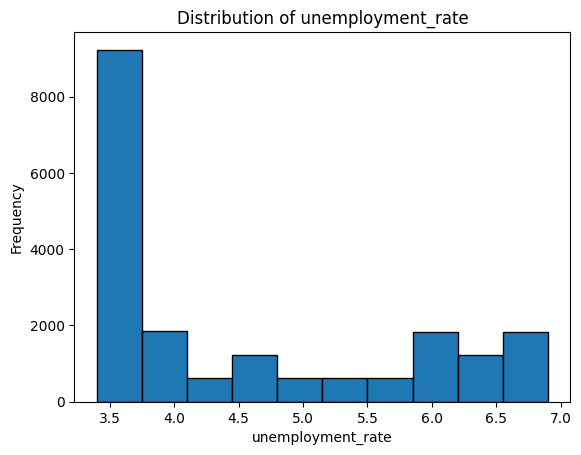

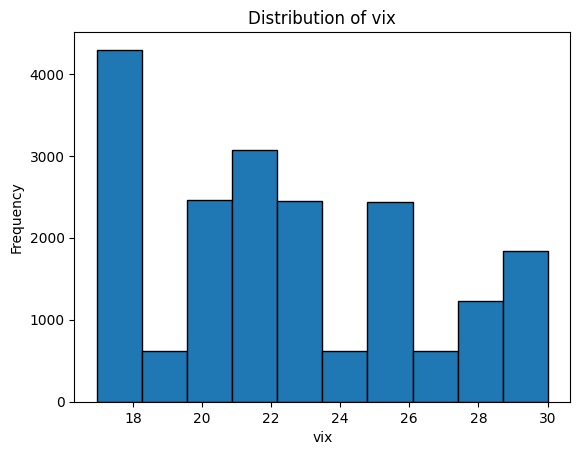

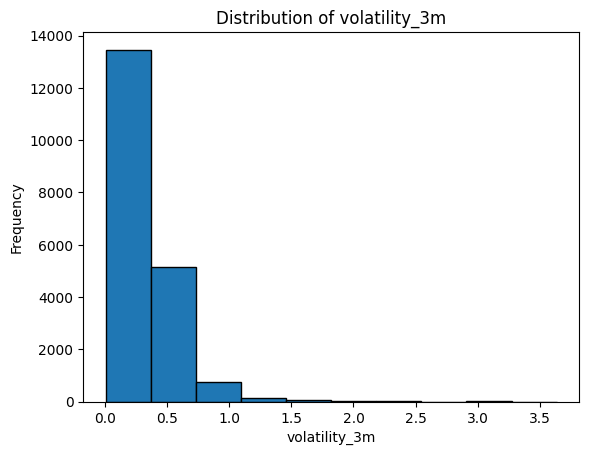

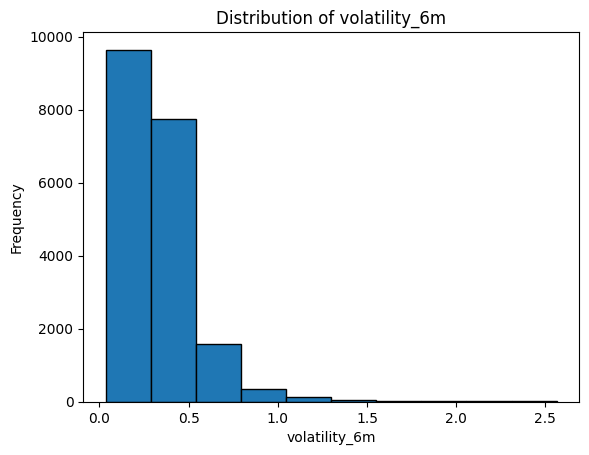

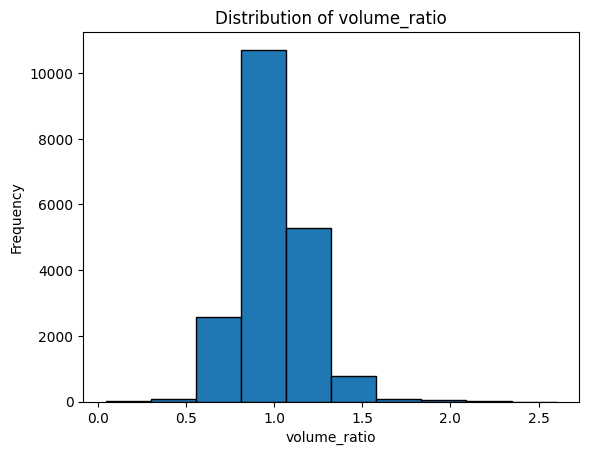

In [13]:
def plot_hist(df, column):
    """Plot histogram of a numeric variable."""
    plt.hist(df[column], edgecolor='k')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

# plot hists for each numerical row
for column in merged_set.columns.difference(['stock_id','month_id']) :
    plot_hist (merged_set, column)

Things we can observe from the plots: 
-  outperform_binary is balanced: there are similar amounts of overperformin/underperforming stocks
-  excess_return (target for regression) is normally distributed
-  'intramonth_return','return_1m','return_3m','return_6m','volume_ratio' features follow a normal distribution
-  most of the other numerical feature are NOT normally distributed

In [14]:
# Compute correlation matrix

numeric_cols = merged_set.select_dtypes(include="number")
corr = numeric_cols.corr()

# Plot correlation heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Numerical Features Correlation Heatmap")
plt.show()

Observations:
-  month_start_open_usd, month_end_close_usd, month_high_usd, month_low_usd are all highly correlated : to avoid collinearity issues we should choose 1 of the 4 to build our model on
-  return_1m and intramonth_return also show high correlation
-  avg_volume_3m and monthly_volume have the same issue
-  price_range_ratio and intramonth_volatility / volatility_6m and volatility_3m also have very high correlations, but not as high as the previous cases, so we might consider keeping them
-  Correlation between each feature and the targets (excess_return and outperform_binary) is very small, and never more than 0.1. This seems to suggest that there are not any strong linear relationships between the numerical terms and the targets

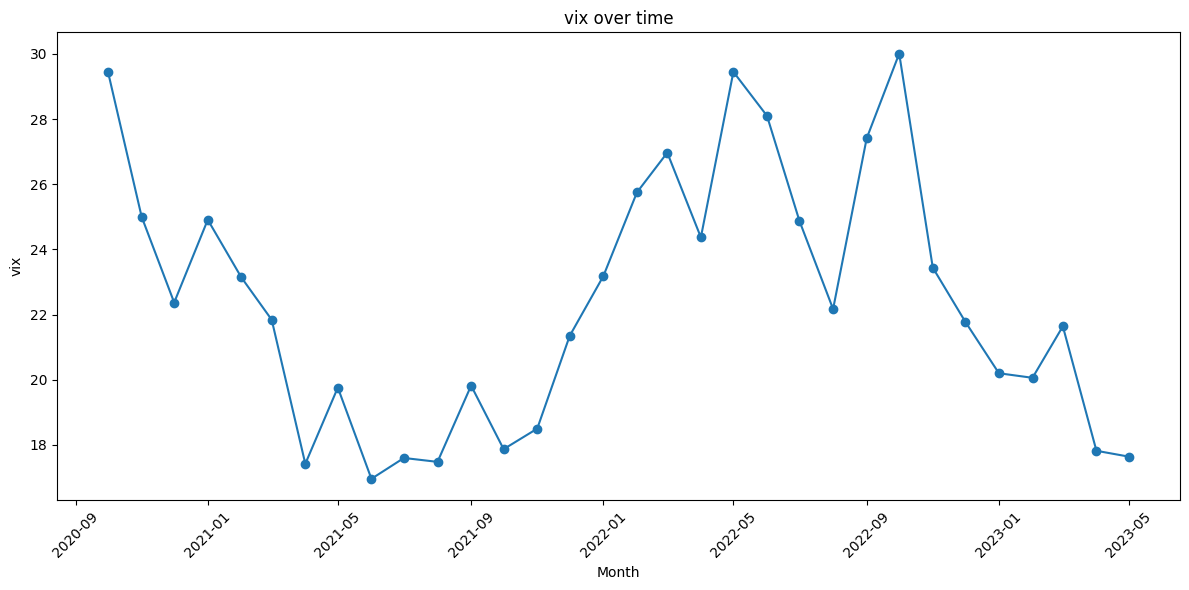

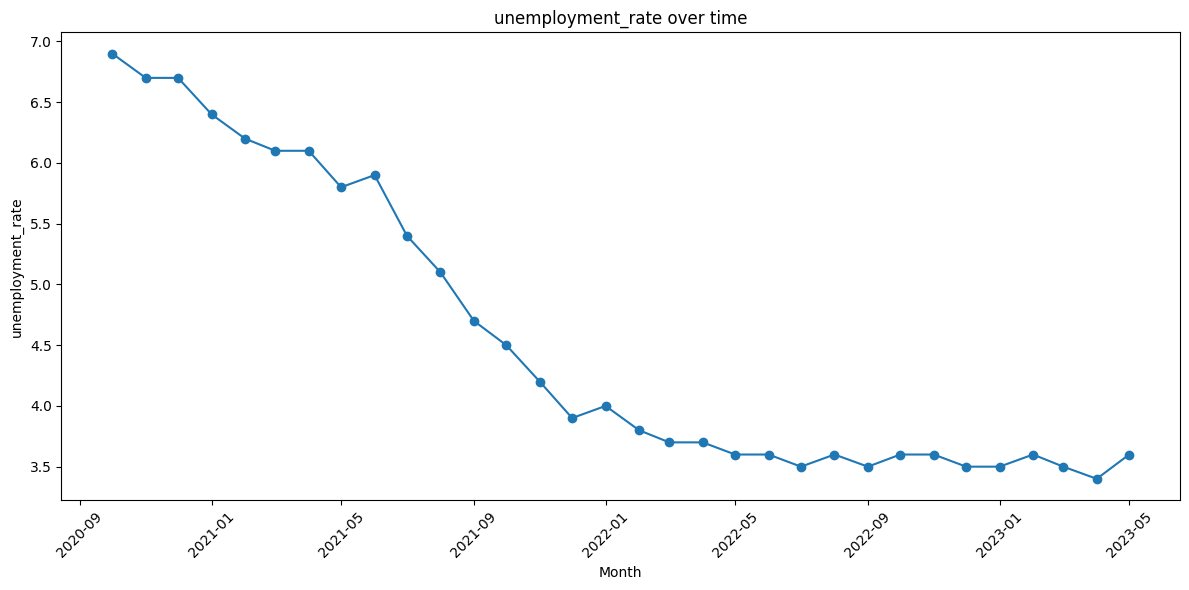

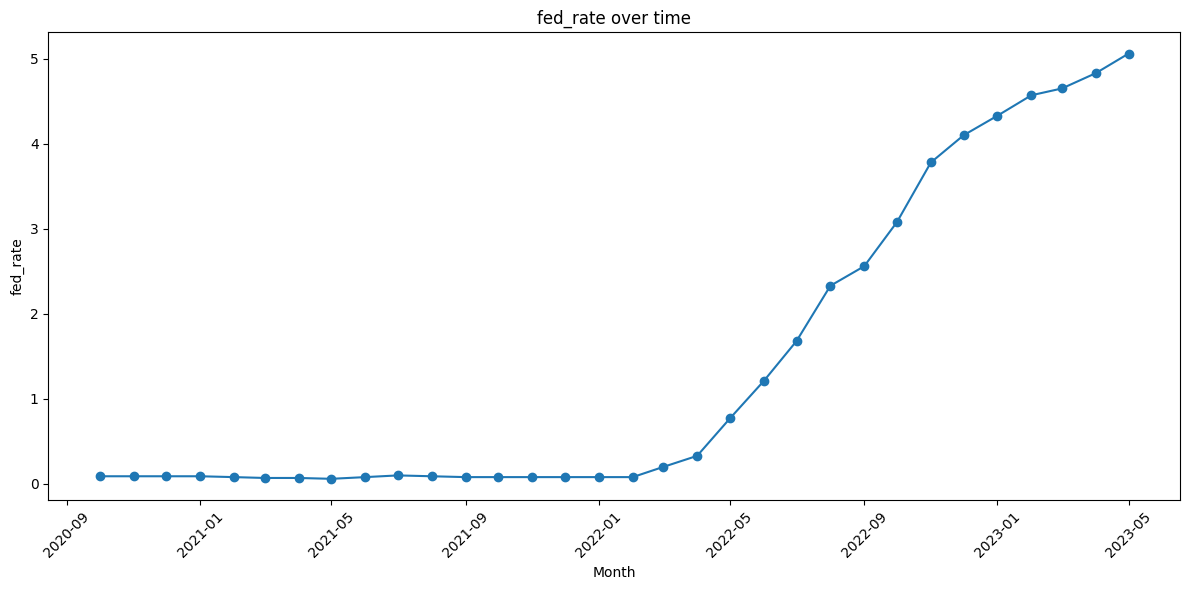

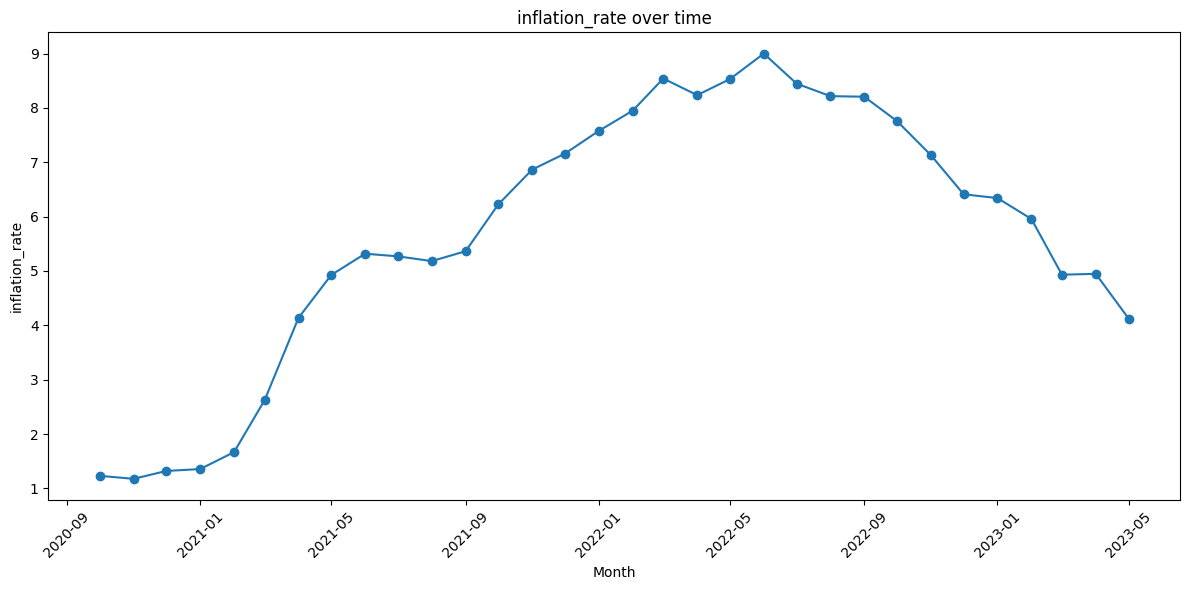

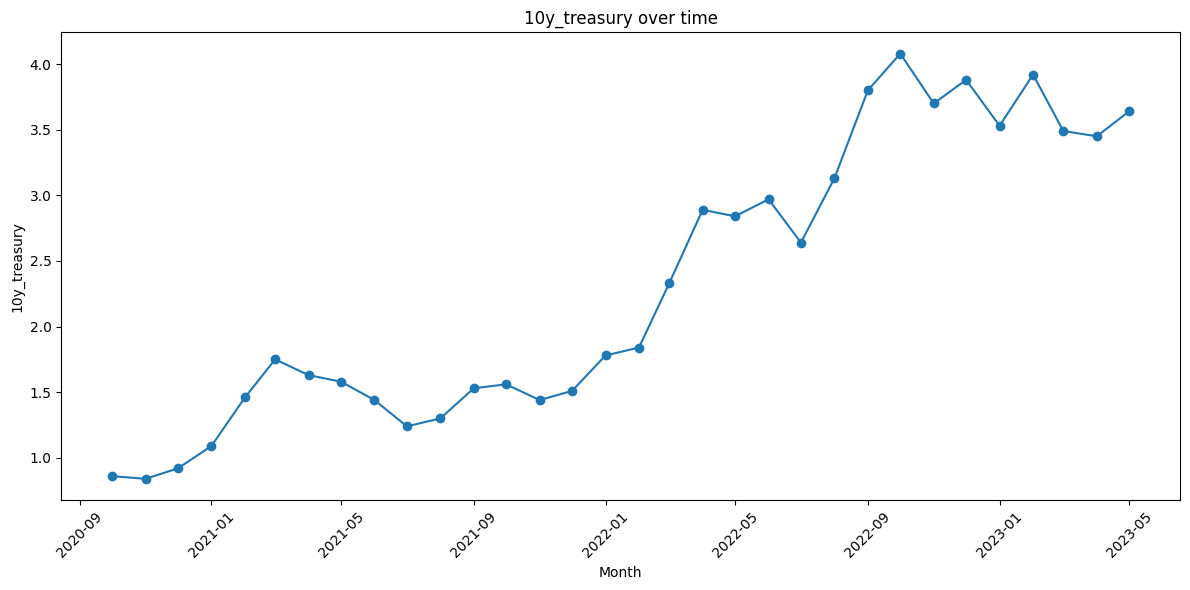

In [15]:
# Collapse to one row per month (since these features don't vary by sector)
macro_by_month = (
    merged_set.groupby("month_id")[["vix", "unemployment_rate", "fed_rate", "inflation_rate", "5y_treasury","10y_treasury"]]
    .mean()
    .reset_index()
)

# Plot each macro feature as its own series
import matplotlib.pyplot as plt

for feat in ["vix", "unemployment_rate", "fed_rate", "inflation_rate", "5y_treasury","10y_treasury"]:
    plt.figure(figsize=(12, 6))
    plt.plot(macro_by_month["month_id"], macro_by_month[feat], marker="o")
    plt.title(f"{feat} over time")
    plt.ylabel(feat)
    plt.xlabel("Month")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [16]:
# Checking class balance
counts = merged_set["outperform_binary_t+1"].value_counts().sort_index()

# Plot bar chart
plt.figure(figsize=(6,4))
counts.plot(kind="bar", color=["steelblue", "orange"])
plt.xticks(ticks=[0,1], labels=["0","1"], rotation=0)
plt.xlabel("outperform_binary_t+1")
plt.ylabel("Count")
plt.title("Distribution of target labels (0 vs 1)")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

As we can see, the classes are pretty balanced between underperformance and overperformance, so we can expect:
- A baseline Accuracy of 0.5, which would be roughly equivalent to random guessing. We will need to try and beat that
- Predicting only the majority class will lead to an F1 score of 0 and accuracy of around 0.5 (we can inspect for that to check for degenerate folds during training)
- Random prediction will lead to an F1 score of around 0.5 (balanced classes)

In [17]:
#ADDED clv feature 
def add_remove_features(df):
    out = df.copy() 
    out["clv"] = ((out["month_end_close_usd"] - out["month_low_usd"]) - (out["month_high_usd"] - out["month_end_close_usd"])) / np.where((out["month_high_usd"] - out["month_low_usd"]) != 0, (out["month_high_usd"] - out["month_low_usd"]), np.nan)
    
    #ADDED log_dollar_vol feature
    out["log_dollar_vol"] = np.log1p(out["monthly_volume"] * out["month_end_close_usd"])
    
    # extract year and month directly
    out['month_stock'] = out['month_id'].dt.month

    
    # define seasonality and quarter
    out['seasonality_sin'] = np.sin((2*np.pi*out['month_stock'])/12)
    out['seasonality_cos'] = np.cos((2*np.pi*out['month_stock'])/12)

    out = out.sort_values(["month_id", "stock_id"])
    
    #Dropping features with high collinearity
    out = out.drop(columns=["month_start_open_usd", "month_low_usd","month_end_close_usd","monthly_volume",
                            "intramonth_return","10y_treasury","index_return","index_value","trading_days","intramonth_volatility",
                            "seasonality_cos","seasonality_sin","month_stock","vix",
                            "5y_treasury","inflation_rate","fed_rate","unemployment_rate"]) 

merged_set = add_remove_features(merged_set)
testing_set = add_remove_features(testing_set)

In [18]:
# Post-filtering correlation matrix (with added features aswell)

numeric_cols = merged_set.select_dtypes(include="number")
corr = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Numerical Features Correlation Heatmap")
plt.show()

Redundant features, having high collinearity such as month high, month low, close and open have been dropped.

In their place, 2 new features have been added :
-  clv: clv feature which gives a summary of the monthly performance of the stock
-  log_dollar_vol: combined feature between volume and stock prize (month close)

In [19]:
# Check skewness
skewness = merged_set.select_dtypes(include=np.number).skew().sort_values(ascending=False)
print(skewness)

avg_volume_3m            18.672460
month_high_usd           11.474216
return_6m                 4.826420
price_range_ratio         4.465631
volatility_6m             3.090674
volatility_3m             2.925484
return_3m                 2.172111
excess_return_t+1         1.679216
return_1m                 1.376651
volume_ratio              0.907420
outperform_binary_t+1     0.013360
clv                      -0.060595
log_dollar_vol           -0.917536
dtype: float64


In [20]:

import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (
    OneHotEncoder, OrdinalEncoder, StandardScaler, FunctionTransformer, PowerTransformer
)
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.stats import loguniform, randint
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

#DATA PREPROCESSING

#sorting values by time/stock
merged_set = merged_set.sort_values(["month_id", "stock_id"])  

#split features and targets
X = merged_set.drop(['outperform_binary_t+1','excess_return_t+1','stock_id','month_id'], axis=1) 
y = merged_set['outperform_binary_t+1']
y_reg = merged_set['excess_return_t+1']
X_test = testing_set.drop(['outperform_binary_t+1','excess_return_t+1','stock_id','month_id'], axis=1)
y_test = testing_set['outperform_binary_t+1']
y_test_reg = testing_set['excess_return_t+1']

# Winsorisation 
class PercentileClipper(BaseEstimator, TransformerMixin):
    """Clip per-column to [lower, upper] percentiles learned on fit."""
    def __init__(self, lower=1.0, upper=99.0):
        self.lower = lower; self.upper = upper
    def fit(self, X, y=None):
        X = np.asarray(X, dtype=float)
        self.lo_ = np.nanpercentile(X, self.lower, axis=0)
        self.hi_ = np.nanpercentile(X, self.upper, axis=0)
        return self
    def transform(self, X):
        X = np.asarray(X, dtype=float)
        return np.clip(X, self.lo_, self.hi_)
    def get_feature_names_out(self, input_features=None):
        if input_features is None:
            # fallback generic names if none provided
            n = getattr(self, "lo_", np.array([None])).shape[0]
            return np.array([f"x{i}" for i in range(n)], dtype=object)
        return np.asarray(input_features, dtype=object)

# Division between categorical and ordinal features + order definition
categorical_cols = ['sector','business_model','geographic_focus','business_maturity','competitive_position']
ordinal_cols = ['market_cap_category','revenue_tier','profitability_profile', 'asset_intensity','financial_strength']
ordinal_order = [
    ['Small', 'Mid', 'Large'],
    ['Tier_1', 'Tier_2', 'Tier_3'],
    ['Low_Margin', 'Standard', 'High_Margin'],
    ['Asset_Light', 'Moderate', 'Capital_Intensive'],
    ['Developing', 'Stable', 'Strong']
]

# numeric columns (exclude ordinals so they aren't double-processed)
numeric_cols = X.select_dtypes(include="number").columns.difference(ordinal_cols)


# returns can be negative -> Yeo–Johnson
return_cols = [c for c in ["return_1m","return_3m","return_6m"] if c in numeric_cols]

# positive-skewed (non-negative) -> log1p
pos_skew_candidates = [
    "avg_volume_3m","month_high_usd","volatility_3m","volatility_6m",
    "price_range_ratio","intramonth_volatility","volume_ratio"
]
pos_skew_cols = [c for c in pos_skew_candidates if c in numeric_cols]

# everything else numeric
other_numeric = [c for c in numeric_cols if c not in set(return_cols + pos_skew_cols)]

# safe log1p
def safe_log1p(X):
    X = np.asarray(X, dtype=float)
    return np.log1p(X)

# pipeline to handle different types of data
pos_skew_pipe = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("winsor", PercentileClipper(lower=1.0, upper=99.0)),
    ("log1p", FunctionTransformer(safe_log1p, feature_names_out="one-to-one")),
    ("scale", StandardScaler())
])

returns_pipe = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("winsor", PercentileClipper(lower=1.0, upper=99.0)),
    ("yeojohnson", PowerTransformer(method="yeo-johnson", standardize=False)),
    ("scale", StandardScaler())
])

other_num_pipe = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("scale", StandardScaler())
])

# One Hot encoding
cat_pipe = Pipeline([
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])
#Ordinal Encoding
ord_pipe = Pipeline([
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("ord", OrdinalEncoder(categories=ordinal_order))
])

# Final Column Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num_pos", pos_skew_pipe, pos_skew_cols),
        ("num_ret", returns_pipe, return_cols),
        ("num_oth", other_num_pipe, other_numeric),
        ("cat",     cat_pipe, categorical_cols),
        ("ord",     ord_pipe, ordinal_cols),
    ],
    remainder="drop"
)

**BEST PERFORMING MODEL : SVC LINEAR**

In [21]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import numpy as np

svc = Pipeline([
    ("preproc", preprocessor),
    ("svc", SVC(kernel="linear", C= 500, class_weight="balanced" ))
])

cv = TimeSeriesSplit(n_splits=5) 

f1s, accs, cms = [], [], []

for fold, (train_idx, test_idx) in enumerate(cv.split(X, y), 1):
    svc.fit(X.iloc[train_idx], y[train_idx])
    yp = svc.predict(X.iloc[test_idx])

    cm = confusion_matrix(y[test_idx], yp)
    cms.append(cm)
    f1s.append(f1_score(y[test_idx], yp, zero_division=0))
    accs.append(accuracy_score(y[test_idx], yp))

    print(f"Fold {fold}")
    print("Confusion matrix:\n", cm)
    print(f"F1={f1s[-1]:.3f}, ACC={accs[-1]:.3f}")
    print("-"*40)

print("Mean F1:", np.mean(f1s))
print("Mean ACC:", np.mean(accs))

#get the prediction
y_pred = svc.predict(X_test)

Fold 1
Confusion matrix:
 [[ 496 1140]
 [ 492 1140]]
F1=0.583, ACC=0.501
----------------------------------------
Fold 2
Confusion matrix:
 [[826 769]
 [872 801]]
F1=0.494, ACC=0.498
----------------------------------------
Fold 3
Confusion matrix:
 [[ 419 1187]
 [ 412 1250]]
F1=0.610, ACC=0.511
----------------------------------------
Fold 4
Confusion matrix:
 [[ 512 1172]
 [ 470 1114]]
F1=0.576, ACC=0.498
----------------------------------------
Fold 5
Confusion matrix:
 [[ 485 1207]
 [ 483 1093]]
F1=0.564, ACC=0.483
----------------------------------------
Mean F1: 0.5652816144416465
Mean ACC: 0.49791921664626687


In [ ]:
#REGRESSION MODEL
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from scipy.stats import loguniform, uniform
from sklearn.svm import SVR

pipe = Pipeline([
    ("preproc", preprocessor),
    ("svr", SVR(cache_size=1000))
])

# Separate search spaces so we don't tune irrelevant params per kernel
search_spaces = [
    {   # linear
        "svr__kernel": ["linear"],
        "svr__C": loguniform(1e-3, 100)
    },
    {   # rbf
        "svr__kernel": ["rbf"],
        "svr__C": loguniform(1e-2, 100),
        "svr__gamma": ["scale"],
        "svr__epsilon": uniform(0.01, 1)
    }
]

#Grid definition

cv = TimeSeriesSplit(n_splits=5 ) 

rs_ts = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=search_spaces,
    n_iter=10,
    cv=cv,               
    scoring="neg_mean_squared_error",
    n_jobs=1,
    random_state=42,
    verbose=2
)

rs_ts.fit(X, y_reg)
y_pred_reg = rs_ts.predict(X_test)
print(rs_ts.best_params_)
print(rs_ts.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .........svr__C=9.6098129470364, svr__kernel=linear; total time=   5.6s
[CV] END .........svr__C=9.6098129470364, svr__kernel=linear; total time=  17.3s
[CV] END .........svr__C=9.6098129470364, svr__kernel=linear; total time=  42.8s
[CV] END .........svr__C=9.6098129470364, svr__kernel=linear; total time= 1.4min
[CV] END .........svr__C=9.6098129470364, svr__kernel=linear; total time= 2.3min
[CV] END ......svr__C=4.5705630998014515, svr__kernel=linear; total time=   2.9s
[CV] END ......svr__C=4.5705630998014515, svr__kernel=linear; total time=   9.1s
[CV] END ......svr__C=4.5705630998014515, svr__kernel=linear; total time=  21.9s
[CV] END ......svr__C=4.5705630998014515, svr__kernel=linear; total time=  44.6s
[CV] END ......svr__C=4.5705630998014515, svr__kernel=linear; total time= 1.2min
[CV] END ......svr__C=0.9643857615941438, svr__kernel=linear; total time=   0.8s
[CV] END ......svr__C=0.9643857615941438, svr__k

In [ ]:
#Finding best rmse and printing
best_rmse = np.sqrt(-rs_ts.best_score_)
print("Best RMSE:", best_rmse)

In [ ]:
#Writing the results to csv
final_result = testing_set[["month_id","stock_id"]].copy()

#Just labelling differences for my implementation
final_result["outperform_binary_t+1"] = y_pred
final_result["excess_return_t+1"] = y_pred_reg
final_result = final_result.rename(columns={
    "outperform_binary_t+1": "outperform_binary",
    "excess_return_t+1": "excess_return"
})
final_result["month_id"] = final_result["month_id"].astype(str).str.replace("2023-06-01", "2023_07")
final_result.to_csv("testing_results.csv",index=False)
